<font color=Red>**Note**</font>: In order to make your answer stand out, please use colored text to write your answer. For example, the following code sets font color to blue.

<font color=Blue>我是蓝色</font>

**<font color=red>You should put answer to every question in a different cell</font>, so that the result can be displayed clearly. You can also add cells when necessary.** 

**<font color=Red>Feel free to add your own analytical questions and your analysis. Good questions can earn bonus points. But remember to use red bolded font (like this text) to highlight them.</font>**

**Rename your Jupyter Notebook file as classNumber_Name, e.g. 11801_张三, and send it to this email address(1614688593@qq.com) before due date.**

<font color=Red>**Due Date: 2021-5-5 23:59**</font>

# Lab 3. Train and evaluate a classification model with Scikit-learn

In this tutorial we are going to practice supervised learning--classification and numeric prediction--with scikit-learn.

# Table of Contents
1. [Basic process](#basic)
    1. [Load dataset](#data)
    2. [Preprocess](#preprocess)
    3. [Generate train-test split](#split)
    4. [Train a classifier](#train)
    5. [Evaluate a classifier](#eval)
2. [Advanced topics](#advanced)
    1. [Evaluate with stratified k-fold cross-validation](#cv)
    3. [With repeated stratified k-fold CV](#repeated)

## <a id='basic'>1. Basic process</a>

**In this tutorial, we are going to use a different dataset: the mushroom dataset, which predicts whether a mushroom is editable based on several features.**

**The major task we are going to perform is firstly load the mushroom dataset, and then build a naive classifier and measure its predictive accuracy (i.e. on the test data).**


## <a id="data">1.1 Load dataset</a>
**Firstly, we need to load the mushroom dataset (mushroom.csv) and as usual, we need to check its shape and sanity.**

**【Q1】How many instances and attributes does this dataset have?**


In [1]:
import pandas as pd

df=pd.read_csv('./mushrooms.csv')
df.shape

(8124, 23)

**【Q2】What is the class attribute that we are going to predict? How many values does it have? How many instances does each class value have?**

In [2]:
print(df['class'].unique())
print(df.groupby('class').size())

['p' 'e']
class
e    4208
p    3916
dtype: int64


**【Q3】How many distinct values does other attribute have and what are their counts?** 

In [3]:
for i in df.columns:
    print(df.groupby(by=i).size())

class
e    4208
p    3916
dtype: int64
cap-shape
b     452
c       4
f    3152
k     828
s      32
x    3656
dtype: int64
cap-surface
f    2320
g       4
s    2556
y    3244
dtype: int64
cap-color
b     168
c      44
e    1500
g    1840
n    2284
p     144
r      16
u      16
w    1040
y    1072
dtype: int64
bruises
f    4748
t    3376
dtype: int64
odor
a     400
c     192
f    2160
l     400
m      36
n    3528
p     256
s     576
y     576
dtype: int64
gill-attachment
a     210
f    7914
dtype: int64
gill-spacing
c    6812
w    1312
dtype: int64
gill-size
b    5612
n    2512
dtype: int64
gill-color
b    1728
e      96
g     752
h     732
k     408
n    1048
o      64
p    1492
r      24
u     492
w    1202
y      86
dtype: int64
stalk-shape
e    3516
t    4608
dtype: int64
stalk-root
?    2480
b    3776
c     556
e    1120
r     192
dtype: int64
stalk-surface-above-ring
f     552
k    2372
s    5176
y      24
dtype: int64
stalk-surface-below-ring
f     600
k    2304
s    4936
y     2

**Notice the type of each attribute. Some are categorical (i.e. nominal/discrete), while others are numeric (i.e. continuous). We might need to preprocess them before building the classifier. So it is always necessary to check attribute types when you get a new dataset and think how to represent them to the classifier.**

**【Q4】Does this dataset has missing value? Drop the missing values if exist.**

In [8]:
print(df.isna().sum())
# df.dropna(inplace=True)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


**【Q5】Peform explorative data analysis, e.g. with proper visualization, and explain your findings.**

D:\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


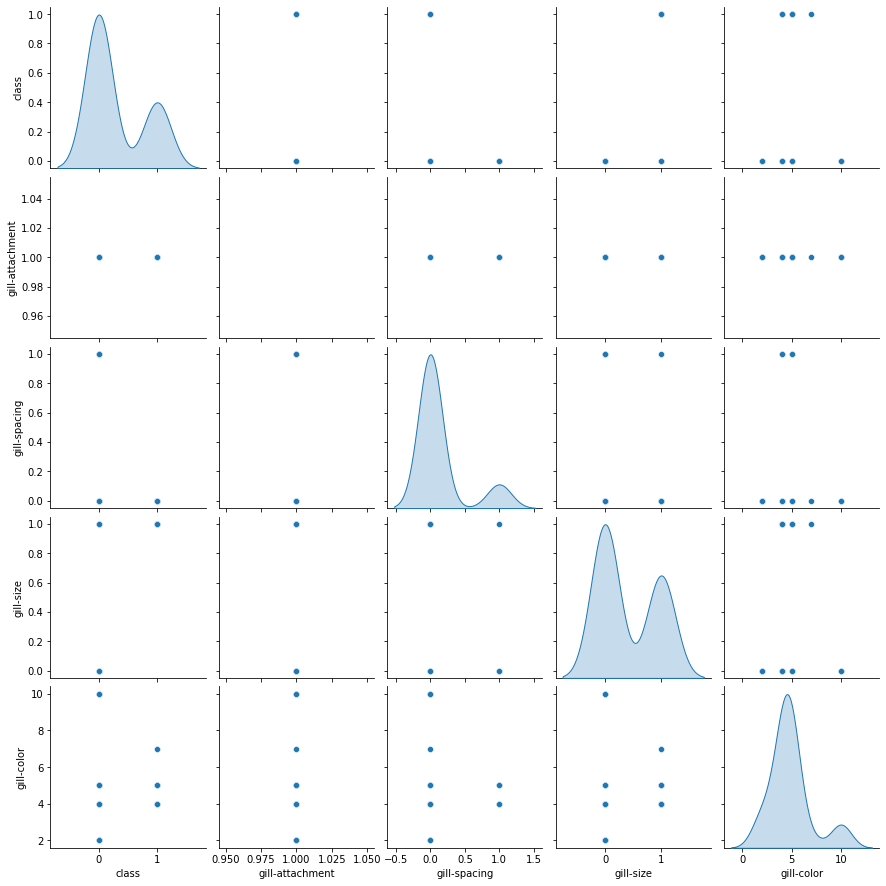

In [10]:
import seaborn as sns
sns_plot = sns.pairplot(df[['class','gill-attachment','gill-spacing','gill-size','gill-color']].head(30), diag_kind="kde")

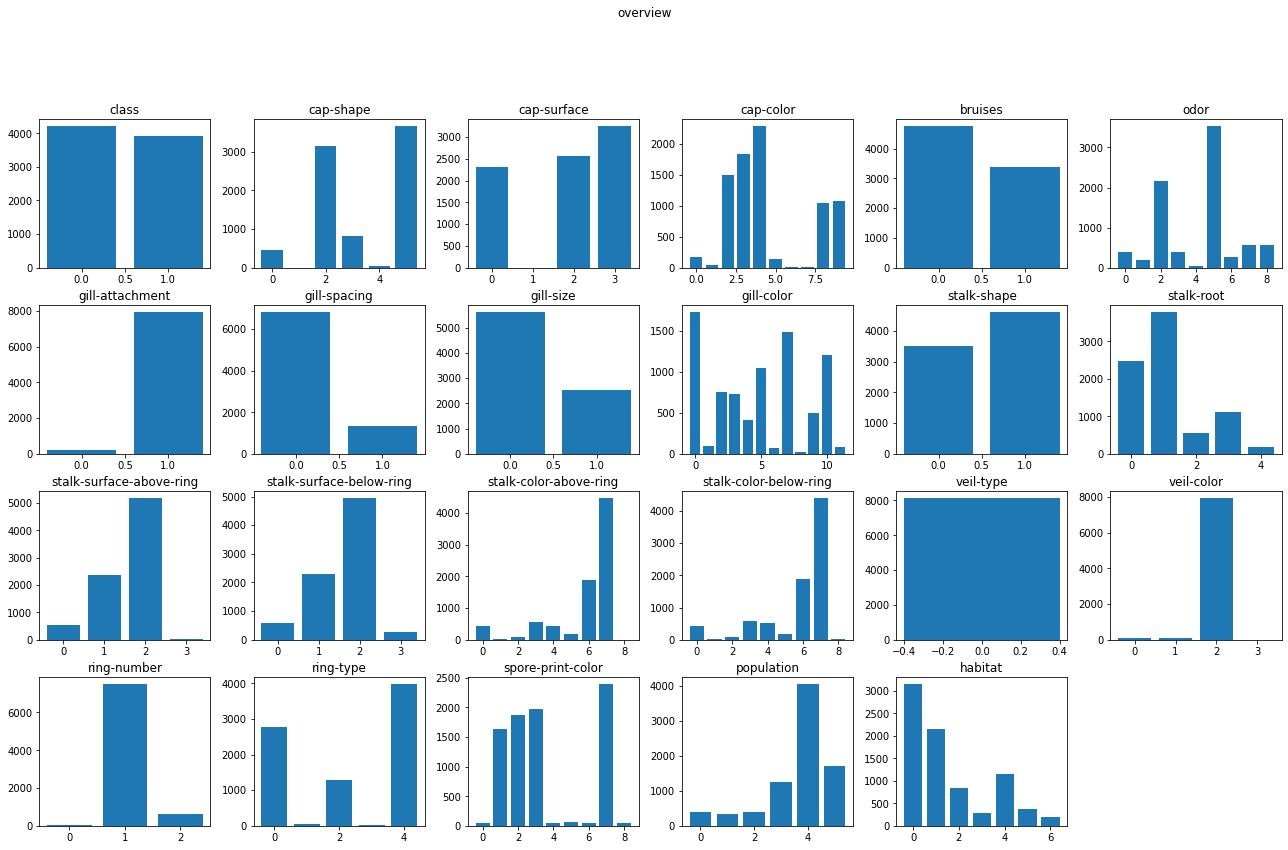

In [51]:
import matplotlib.pylab as plt

fig=plt.figure(figsize=(18,12))
for i in range(len(df.columns)):
    sp=fig.add_subplot(4,6,i+1)
    plt_data=df.groupby(by=df.columns[i]).size()
    sp.bar(plt_data.index,plt_data)
    sp.title.set_text(df.columns[i])

fig.tight_layout(h_pad=1)
fig.suptitle('overview')
plt.subplots_adjust(top=0.85)
plt.show()

## <a id="preprocess">1.2 Preprocess</a>
**In order to build classification model, we first need to convert categorical attribute into numeric values.**

**The sklearn.preprocessing.LabelEncoder can be used for this purpose.**

**Recall from the lecture that the general procedure of performing feature transformation with scikit-learn preprocessors:**
- define the preprocessor
- fit it to the data (usually a column of a dataframe)
- tranform the column data and use the transformed data to replace the old column

For more details, please read: <a href="https://scikit-learn.org/stable/modules/preprocessing.html">Scikit-learn's documentation on preprocessing</a> and the <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing">API</a>

**【Q6】Use LabelEncoder to transform categorical attributes into numeric attributes. Print out the transformed values and check the changes.**

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col])
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


## <a id="split">1.3 Generate train-test split</a>

**In practice, dataset is usually not big enough. So we need to split them into training and testing sets, i.e. use the training subset to build the classification model and use the test set for evaluation.**

**The sklearn.model_selection.train_test_split can be used to split a dataset into two subsets. Read the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">API of this class</a> and split the mushroom dataset into 70% for training and 30% for testing.** 

**【Q7】Create the feature matrix (name it X) by deleting the class column.**

In [54]:
X=df.drop('class',axis=1)

**【Q8】Create the class vector (name it y) by selecting the class column.**

In [55]:
y=df['class']

**【Q9】Check the shape of X and the length of y to make sure they correspond to the same number of instances.**

In [56]:
print(X.shape,y.shape)

(8124, 22) (8124,)


**【Q10】create train/test splits using train_test_split, use 70% for training, and check the shape of the resulting subsets (X_train, X_test, y_train, y_test).**

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5686, 22) (5686,) (2438, 22) (2438,)


## 1.4 Train a classifier model

**Scikit-learn has implemented many classic classification algorithms. In this tutorial we are going to use two classifiers: the Gaussian Naive Bayes classifier (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html">API</a>) and the Decision Tree classifier (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">API</a>).**

**You can find more Naive Bayes classifiers <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes">here</a>, and more tree-like classifiers <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree">here</a>.**

**The general process of building a classifier is as follows:**
- define the classifier object
- fit the classifier to training data (with labels)
- gets predictions on the test data
- evaluates the classifier on the training data and the test data.

**Read the documentation of the Naive Bayes classifier, see the Examples section for example usage.** 

**【Q11】Build a Naive Bayes classifier from the training subset.**

In [58]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

## 1.5 Evaluate the classifier

**Read user guide on classification evaluation metrics <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics">here</a>.**

**【Q12】Read the documentation of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">sklearn.metrics.accuracy_score</a>, and compute the accuracy of the classifier built above on test data.**

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

0.9294503691550451

**【Q13】Read the documentation of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html">sklearn.metrics.classification_report</a>, and output the classification report on test data.**

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test), target_names=['p','e']))

              precision    recall  f1-score   support

           p       0.93      0.93      0.93      1257
           e       0.93      0.93      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



**【Q14】(optional) Evaluate the classifier with another metric, e.g. F1 score, confusion matrix, using f1_score and confusion_matrix (references their APIs). You can also try the plot_confusion_matrix class to visualize the confusion matrix.** 

0.9294485156374878


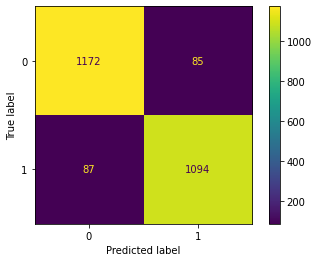

In [65]:
from sklearn.metrics import f1_score
print(f1_score(y_test, clf.predict(X_test), average='weighted'))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

# <a id='advanced'>2. Advanced topics</a>

1. perform 10-fold stratified cross-validation
1. perform repeated k-fold cv

## <a id="cv">2.1 Perform 10-fold stratified cross-validation</a>

**Build and evaluate the GaussianNB model with 10-fold cross validation, using the sklearn.model_selection.StratifiedKFold class (see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html">API</a>).**

**The general steps are:**
- define the splitter class: 
    - skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
- generate the splits with input and output data: 
    - skf.get_n_splits(X, y)
- iterate the splits, in each iteration, first gets the training set and test set, then build and evaluate the the classifier:
    - for train_index, test_index in skf.split(X, y):
    -    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    -    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    -    train the classifier
    -    compute accuracy score on the test data
    -    update the avgerage accuracy
    
**【Q15】Train and test the GaussianNB on the mushroom dataset with StratifiedKFold.** 

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

acc_list=[]
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf.get_n_splits(X, y)
clf = GaussianNB()
for train_index, test_index in skf.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    acc_list.append(accuracy_score(y_test, clf.predict(X_test)))
    # print(accuracy_score(y_test, clf.predict(X_test)))
print(np.mean(acc_list))

0.9214671986621343


## <a id="repeated">2.2 Repeated stratified k-fold CV</a>

**【Q16】(Optional) We can make the evaluation more reliable by repeating the stratified k-fold CV multiple times. The general steps are the same. Read Scikit-learn's API and evlauate the GaussianNB on the mushroom dataset with RepeatedStratifiedKFold.** 

In [71]:
from sklearn.model_selection import RepeatedStratifiedKFold

clf = GaussianNB()
rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=2,random_state=36851234)
for train_index, test_index in rskf.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    print(accuracy_score(y_test, clf.predict(X_test)))

0.9219596258000985
0.9182668636139832
0.9165435745937962
0.9234367306745446
